In [16]:
import numpy as np
import matplotlib.pyplot as plt
from motion_integration import get_bond_lengths, find_bond_forces, nondimensionalize
from binding_expt import parse_file

In [17]:
with np.load('data/bd_run044.npz') as data:  # Trial with a large jump to a negative z value
    t = data['t']
    x = data['x']
    y = data['y']
    z = data['z']
    r_matrices = data['r_matrices']
    bond_array = data['bond_array']
    receptors = data['receptors']

pars = parse_file('bd_run044')
del pars['filename']
del pars['seed']
del pars['t_start']
del pars['t_end']
del pars['num_steps']
del pars['n_nodes']
del pars['a']
del pars['b']
del pars['adaptive']
del pars['one_side']
del pars['check_bonds']
t_sc, f_sc, lam, k0_on, k0_off, eta, eta_ts, kappa = nondimensionalize(l_scale=1, mu=4e-3, temp=310., **pars)

In [40]:
z_diffs = (z[1:] - z[:-1]) / (t[1:] - t[:-1])
ii = np.nonzero(z_diffs > 1000)[0][0]
print(ii)
print(bond_array[..., ii - 1])
print()
print(bond_array[..., ii])
print()
print(bond_array[..., ii + 1])
print()
print(bond_array[..., ii + 2])

66
[[6.60000000e+02 2.00000000e-02 1.11029398e+01]]

[[6.60000000e+02 2.00000000e-02 1.11029398e+01]]

[[-1. -1. -1.]]

[[-1. -1. -1.]]


In [50]:
t[65:75]

array([0.108     , 0.11      , 0.11001562, 0.11003125, 0.1100625 ,
       0.110125  , 0.11025   , 0.1105    , 0.111     , 0.112     ])

In [52]:
bond_array[0, :, 65:75].T

array([[ 6.60000000e+02,  2.00000000e-02,  1.11029398e+01],
       [ 6.60000000e+02,  2.00000000e-02,  1.11029398e+01],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00, -1.00000000e+00]])

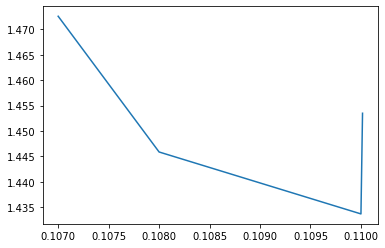

In [36]:
plt.plot(t[ii-2:ii+2], x[ii-2:ii+2])
plt.show()

In [37]:
# Process bonds

def find_forces(i):
    rmat = r_matrices[..., i]
    true_receptors = np.dot(receptors, rmat.T)
    x1, x2, x3 = x[i], y[i], z[i]
    true_receptors += np.array([[x1, x2, x3]])

    bond_list = [row for row in bond_array[..., i] if row[0] > -1]
    get_bond_lengths(bond_list, true_receptors)

    center = np.array([x1, x2, x3])
    return find_bond_forces(receptors, bond_list, center, rmat, kappa, lam)

In [38]:
f1, t1 = find_forces(ii-3)
f2, t2 = find_forces(ii-2)
f3, t3 = find_forces(ii-1)
f4, t4 = find_forces(ii)

print(np.linalg.norm(f2 - f1), np.linalg.norm(t2 - t1))
print(np.linalg.norm(f2 - f3), np.linalg.norm(t2 - t3))
print(np.linalg.norm(f4 - f3), np.linalg.norm(t4 - t3))

0.0 0.0
227.4354239746517 258.19609320900855
26590.56276180576 36027.55339184823


In [7]:
ii

67

In [11]:
t[ii-1]

0.10799999999999994

In [12]:
f3, t3

(array([-140.09851581, -384.47409438,  761.51489618]),
 array([-156.64102483, 1141.43652657,  547.4713651 ]))

In [14]:
f4, t4

(array([ -32769.07528813,   54648.86336906, -115851.9683054 ]),
 array([-34982.82961171,  -5485.28497831,   7307.5183823 ]))

In [15]:
t[ii-5:ii+20]

array([0.105     , 0.106     , 0.107     , 0.1075    , 0.108     ,
       0.11      , 0.11000195, 0.11000391, 0.11000781, 0.11001562,
       0.11003125, 0.1100625 , 0.110125  , 0.11025   , 0.1105    ,
       0.111     , 0.112     , 0.114     , 0.116     , 0.118     ,
       0.12      , 0.122     , 0.124     , 0.126     , 0.128     ])

In [39]:
t

array([0.        , 0.002     , 0.004     , 0.006     , 0.008     ,
       0.01      , 0.012     , 0.014     , 0.016     , 0.018     ,
       0.02      , 0.022     , 0.024     , 0.026     , 0.028     ,
       0.03      , 0.032     , 0.034     , 0.036     , 0.038     ,
       0.04      , 0.042     , 0.044     , 0.046     , 0.048     ,
       0.05      , 0.052     , 0.054     , 0.056     , 0.058     ,
       0.06      , 0.062     , 0.064     , 0.066     , 0.068     ,
       0.07      , 0.072     , 0.074     , 0.076     , 0.078     ,
       0.08      , 0.082     , 0.084     , 0.086     , 0.088     ,
       0.09      , 0.092     , 0.094     , 0.096     , 0.098     ,
       0.099     , 0.09925   , 0.0995    , 0.09975   , 0.1       ,
       0.1005    , 0.10075   , 0.101     , 0.102     , 0.103     ,
       0.104     , 0.105     , 0.106     , 0.1065    , 0.107     ,
       0.108     , 0.11      , 0.11001562, 0.11003125, 0.1100625 ,
       0.110125  , 0.11025   , 0.1105    , 0.111     , 0.112  